In [44]:
import numpy as np
import pandas as pd
import bean as be
from bean import Edit
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

In [4]:
plt.style.use('default')

# Load and prepare ReporterScreen


## Tiling screen data

In [5]:
cdata = be.read_h5ad(f"../results/filtered_annotated/LDLRCDS/bean_count_LDLRCDS_masked.h5ad")

In [7]:
cdata_bulk = cdata[:,cdata.condit.bin == "bulk"]

In [9]:
cdata_bulk_fs = cdata_bulk[:,~cdata_bulk.condit.rep.isin([f"rep{n}" for n in range(1,5)])]

In [15]:
cedit_rates_df = be.pl.editing_patterns.get_edit_rates(cdata_bulk_fs)

Calibrating edits in editable positions...:   0%|          | 0/7320 [00:00<?, ?it/s]

## Variant targeting screen

Guides in this data has designated target position at one of P3-8 with. We will use the target position editing efficiency for PAM preference and not for position-wise editing efficiency analyses.

In [6]:
vdata = be.read_h5ad(f"../results/filtered_annotated/LDLvar/bean_count_LDLvar_masked.h5ad")

In [8]:
vdata_bulk = vdata[:, vdata.condit.bin == "bulk"]

In [10]:
vdata_bulk_fs = vdata_bulk[:,~vdata_bulk.condit.rep.isin([f"rep{n}" for n in range(1,5)])]

In [11]:
target_pos = vdata_bulk_fs.guides.loc[vdata_bulk_fs.uns['edit_counts'].guide, "target_pos"].reset_index(drop=True)

In [12]:
rel_pos = vdata_bulk_fs.uns['edit_counts'].edit.map(lambda e: e.rel_pos)

In [13]:
vdata_bulk_fs.uns['target_edit_counts'] = vdata_bulk_fs.uns['edit_counts'].loc[rel_pos == target_pos, :].reset_index(drop=True)

In [16]:
vedit_rates_df = be.pl.editing_patterns.get_edit_rates(vdata_bulk_fs, edit_count_key='target_edit_counts', add_absent=False)

<AxesSubplot: xlabel='Protospacer position', ylabel='A>G editing rate'>

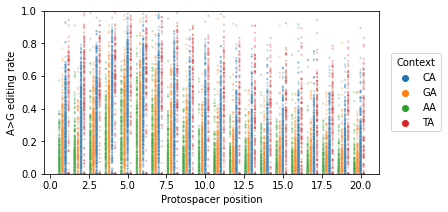

In [17]:
be.pl.editing_patterns.plot_by_pos_context(cedit_rates_df)

### BE-Hive like plotting


In [18]:
cedit_rates_df.spacer_pos = cedit_rates_df.spacer_pos.astype(int)

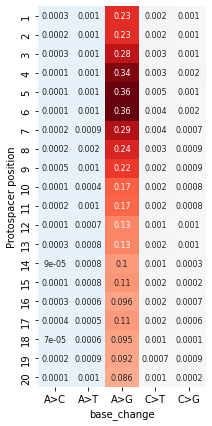

In [20]:
be.pl.editing_patterns.plot_by_pos_behive(
    cedit_rates_df,
    cdata_bulk_fs,
    target_basechange=cdata_bulk_fs.uns['target_base_change'], 
    nonref_base_changes = ["C>T", "C>G"]
)
plt.savefig("1b_pos_eff_behive_LDLRCDS.pdf", bbox_inches = 'tight')

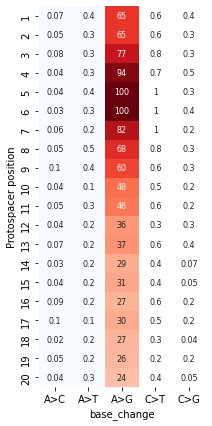

In [23]:
be.pl.editing_patterns.plot_by_pos_behive(
    cedit_rates_df,
    cdata_bulk_fs,
    target_basechange=cdata_bulk_fs.uns['target_base_change'], 
    nonref_base_changes = ["C>T", "C>G"],
    normalize=True
)
plt.savefig("1b_pos_eff_behive_LDLRCDS_normed.pdf", bbox_inches = 'tight')

## Combination with PAM


In [114]:
cedit_rates_df_ag = cedit_rates_df.loc[cedit_rates_df.base_change == "A>G",:]

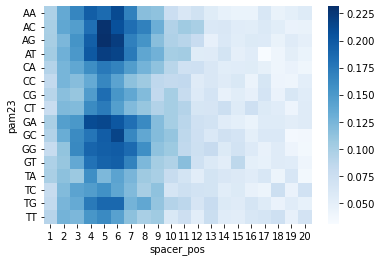

In [28]:
be.pl.editing_patterns.plot_by_pos_pam(cdata_bulk_fs, cedit_rates_df)
plt.savefig("1b_pos_by_pam_LDLRCDS.pdf", bbox_inches = 'tight')

/data/pinello/PROJECTS/2021_08_ANBE/software/bean/bean/plotting/editing_patterns.py:303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def get_position_by_pam_rates(bdata, edit_rates_df: pd.DataFrame):
/data/pinello/PROJECTS/2021_08_ANBE/software/bean/bean/plotting/editing_patterns.py:306: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ].reset_index(drop=True)
/data/pinello/PROJECTS/2021_08_ANBE/software/bean/bean/plotting/editing_patterns.py:307: SettingWithCopyWarning: 
A value is trying to be set on a cop

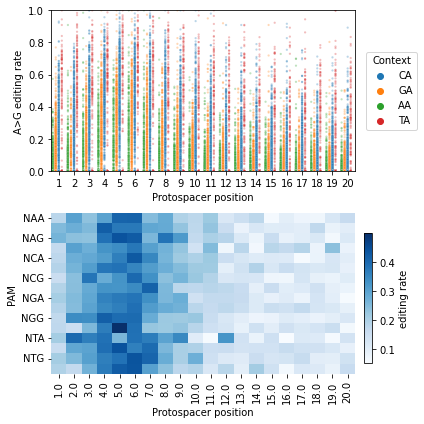

In [20]:
be.pl.editing_patterns.plot_by_pos_pam_and_context(cdata_bulk_fs, cedit_rates_df_ag)
plt.savefig("1b_pos_pam_and_context.pdf", bbox_inches = 'tight')

In [110]:
vedit_rates_df_ag = vedit_rates_df.loc[vedit_rates_df.base_change == "A>G",:]
cedit_rates_df_ag_window = cedit_rates_df_ag.loc[(cedit_rates_df_ag.spacer_pos >= 4) & (cedit_rates_df_ag.spacer_pos < 8)].copy()
all_rates = deepcopy(pd.concat([cedit_rates_df_ag_window, vedit_rates_df_ag]))

Normalizing per context mean


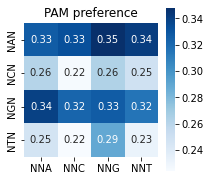

In [137]:
be.pl.editing_patterns.plot_pam_preference(all_rates)
plt.savefig("1b_pam_varcds_combined.pdf", bbox_inches='tight')